# A flight  Flight delay causation
## by Jared D'souza

## Preliminary Wrangling

> The data tha will be loaded for this project will be a dataset downloaded from the Bureau of Transportation Statistics. It tracks the on-time performance of domestic flights operated by large airlines.

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [42]:
#Loading the dataset into 
df = pd.read_csv('airline_delay_causes.csv')

# Dataset Overview

Before exploring the data, I would like to have a high level view of the datasetto have an idea of what I will be heading into.

In [43]:
print(df.shape)
print(df.dtypes)
df.head(10)

(20946, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN
5,2019,1,MQ,Envoy Air,SPI,"Springfield, IL: Abraham Lincoln Capital",53.0,5.0,2.91,0.00,...,1.00,2.0,0.0,169.0,100.0,0.0,28.0,0.0,41.0,NaN
6,2019,1,MQ,Envoy Air,SPS,"Wichita Falls, TX: Sheppard AFB/Wichita Falls ...",88.0,8.0,2.36,0.22,...,2.97,6.0,0.0,263.0,98.0,5.0,66.0,0.0,94.0,NaN
7,2019,1,MQ,Envoy Air,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",31.0,13.0,1.25,0.55,...,1.30,2.0,0.0,537.0,41.0,60.0,391.0,0.0,45.0,NaN
8,2019,1,MQ,Envoy Air,STL,"St. Louis, MO: St Louis Lambert International",59.0,15.0,3.61,2.07,...,4.28,7.0,0.0,683.0,205.0,78.0,218.0,0.0,182.0,NaN
9,2019,1,MQ,Envoy Air,SUX,"Sioux City, IA: Sioux Gateway Brig Gen Bud Day...",116.0,16.0,0.00,1.69,...,5.51,16.0,0.0,658.0,0.0,88.0,238.0,0.0,332.0,NaN


In [34]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,20946.0,20946.000000,20932.000000,20927.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,0.0
mean,2019.0,6.548124,354.578492,66.385674,18.529209,2.212045,20.996112,0.126231,24.506268,6.445872,0.901968,4581.010940,1402.300783,252.364848,1100.938945,6.377030,1819.029333,NaN
std,0.0,3.454813,994.222826,177.396659,44.285872,6.821045,67.444734,0.545841,68.196091,26.798972,3.937406,13349.726176,3859.290938,903.289207,4239.372921,40.753285,5278.977954,NaN
min,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.0,4.000000,48.000000,7.000000,2.130000,0.000000,1.320000,0.000000,2.000000,0.000000,0.000000,402.750000,115.000000,0.000000,48.000000,0.000000,114.000000,NaN
50%,2019.0,7.000000,93.000000,18.000000,5.990000,0.530000,4.260000,0.000000,6.180000,1.000000,0.000000,1154.000000,380.000000,24.000000,166.000000,0.000000,422.000000,NaN
75%,2019.0,10.000000,237.000000,46.000000,15.062500,1.930000,11.990000,0.000000,16.740000,4.000000,1.000000,3100.250000,1085.000000,169.000000,513.000000,0.000000,1257.000000,NaN
max,2019.0,12.000000,21873.000000,3714.000000,966.330000,175.560000,1485.820000,12.510000,1429.550000,933.000000,115.000000,329847.000000,97970.000000,23749.000000,97283.000000,3194.000000,125086.000000,NaN


### What is the structure of your dataset?
There are 280833 monthly flight performance details at various airports with 22 features with a lot of numeric variables.

### What is/are the main feature(s) of interest in your dataset?

I am interested in seeing if there are categorical features that have a correlation with numerial features. Present which airports are best for timely departures and arrivals. Which delays are good predictors for cancelled flights

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

From my experience traveling many times by flight, I strongly believe that weather delays leads to cancelled flights.

#### Try grouping airline cancellations per month

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

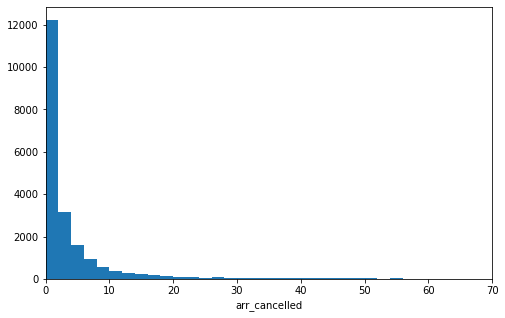

In [44]:
binsize = 2
bins = np.arange(0, df['arr_cancelled'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'arr_cancelled', bins = bins)
plt.xlim([0,70])
plt.xlabel('arr_cancelled')
plt.show()

There appears to be a long tail distribution with some significant outliers. I will observe the log scale instead.

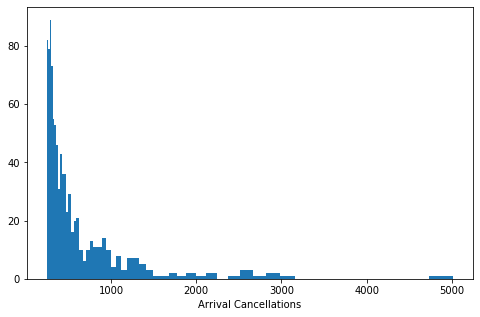

In [6]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['arr_cancelled'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'arr_cancelled', bins = bins)

plt.xlabel('log(arr_cancelled)')
plt.xlabel('Arrival Cancellations')
plt.show()


Both a natural unit and natural log unit histogram graph the arrival cancellation feature as right skewed. This means that the frequency of cancellations is concentrated to between 1 and 10 flights 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [ ]:
#Looking at other variables
fig, ax = plt.subplots(nrows=4, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'carrier_ct', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'nas_ct', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'security_ct', color = default_color, ax = ax[2])
sb.countplot(data = df, x = 'late_aircraft_ct', color = default_color, ax = ax[3])

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [7]:
numeric_vars = ['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
categoric_vars = ['carrier_name']

In [ ]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [9]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
   

In [ ]:
# create faceted heat maps on levels of flight cancelled variable
g = sb.FacetGrid(data = df, col = 'carrier_ct', col_wrap = 3, size = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'carrier_ct', 'arr_cancelled', color = 'inferno_r')
g.set_xlabels('Carrier cancelled')
g.set_ylabels('Arrival cancelled')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!